In [ ]:
#Entrenamiento de Red Neuronal Convolucional
#Diego Iván Vázquez García      Matricula: 2007424        Hora:N4

# Importamos las Librerias necesarias

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Cargar datos MNIST

In [13]:
# Cargar datos MNIST (automáticamente divide en conjuntos de entrenamiento y prueba)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizar las primeras 25 imágenes del conjunto de entrenamiento con etiquetas

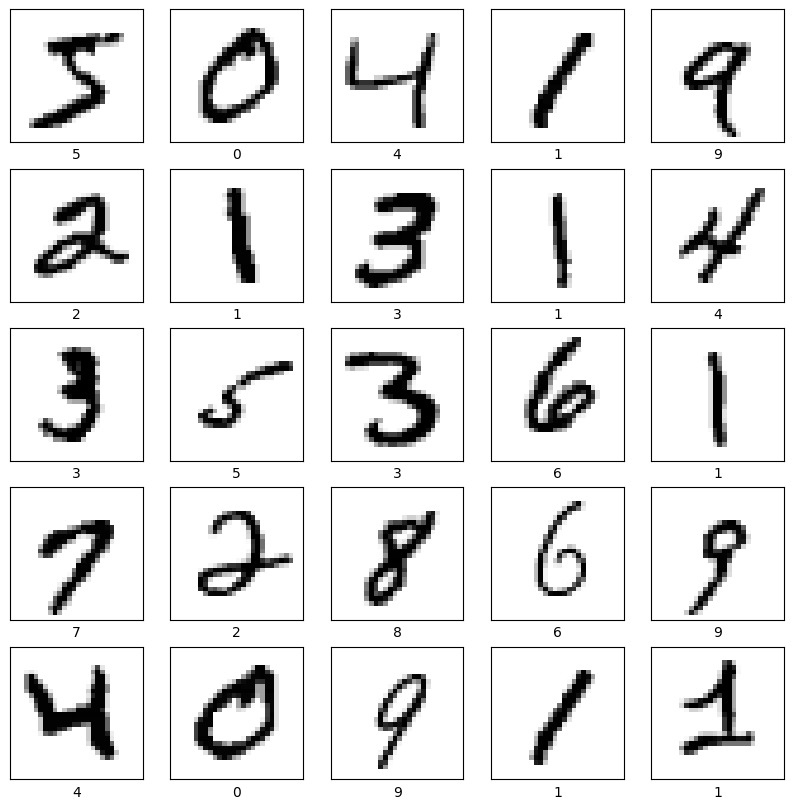

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])  # Mostrar la etiqueta (número real)
plt.show()

# Preprocesar los datos

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# Definir y compilar el modelo Red Neuronal Convolucional

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo

In [17]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1285 - accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0161 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0073 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 55s 29m

# Evaluar el modelo con datos de prueba

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Exactitud del modelo en datos de prueba: {test_accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0521 - accuracy: 0.9883
Exactitud del modelo en datos de prueba: 0.9883000254631042


# Realizar predicciones con datos de prueba

In [19]:
predictions = model.predict(x_test[:5])

1/1 [==============================] - 0s 78ms/step


# Mostrar predicciones y valores reales

In [20]:
for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = y_test[i]
    print(f'Predicción: {predicted_label}, Valor Real: {true_label}')

Predicción: 7, Valor Real: 7
Predicción: 2, Valor Real: 2
Predicción: 1, Valor Real: 1
Predicción: 0, Valor Real: 0
Predicción: 4, Valor Real: 4


# Vamos a mostrar la arquitectura de su modelo hasta ahora:

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Agregue capas densas en la parte superior

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Aquí está la arquitectura completa de su modelo

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Compilar y entrenar el modelo

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2394 - accuracy: 0.9508 - val_loss: 0.0660 - val_accuracy: 0.9890
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0237 - accuracy: 0.9958 - val_loss: 0.0648 - val_accuracy: 0.9899
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0192 - accuracy: 0.9968 - val_loss: 0.0596 - val_accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0183 - accuracy: 0.9967 - val_loss: 0.0676 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0155 - accuracy: 0.9971 - val_loss: 0.0574 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0151 - accuracy: 0.9974 - val_loss: 0.0593 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0143 - accuracy: 0.9973 - val_loss: 0.0516 -

# Evaluar el modelo

313/313 - 3s - loss: 0.0800 - accuracy: 0.9880 - 3s/epoch - 11ms/step


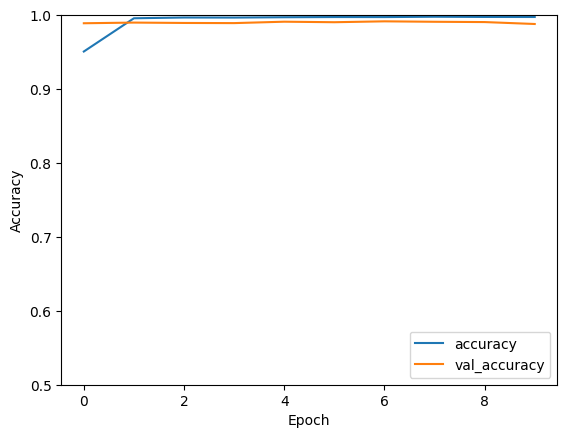

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [28]:
print(test_acc)

0.9879999756813049


¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5? Use las mismas epocas, para esta actividad en este caso 10.

¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?  Es más probable que un modelo Concolucional sea más efectivo debido a la capacidad de las capas convolucionales para extraer y aprender características importantes de las imágenes, como bordes, texturas y patrones locales. Esto puede conducir a una mejor capacidad de generalización y precisión en comparación con un modelo Prealimentado estándar.